In [50]:
# Importing the necessery libraries
import numpy as np
import os
import pandas as pd
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tkinter as tk
from tkinter import Listbox, Entry, Scrollbar, StringVar, END

In [ ]:
# Creating the matrix which will store the values for the specific categories
matrix = np.zeros([1000, 2])


# Importing data and assiging values for every different categories, and store them in a different dataframe
data = pd.read_excel(r'C:\\asd\\games.xls')
X = pd.DataFrame(matrix)
game_names = X.iloc[:, :]
categories = data.iloc[:, 1:data.shape[1]]
col_num = categories.shape[1]
row_num = categories.shape[0]

index_no = 1
for i in range(1, col_num):
    for j in range(row_num):
        var = categories.iloc[j, i]
        if type(var) != int and str(var) != 'nan':
            temp_categ = categories.values
            if any(var in row for row in temp_categ):
                game_names.iloc[index_no - 1, 0] = (index_no - 1)
                game_names.iloc[index_no - 1, 1] = var
                X = np.array(temp_categ)
                X[np.where(X == str(var))] = index_no
                categories = pd.DataFrame(X)
            index_no += 1




# Writing '0' to every blanks
categories_values = categories.values
categ_list = np.array(categories_values)
categ_list[pd.isna(categ_list)] = 0

In [ ]:
# Determine the output matrix and start to prepare input matrix
categories = ((pd.DataFrame(categ_list)).iloc[:, 1:col_num]).values
output = (data.iloc[:, 1]).values

In [ ]:
# Creating input matrix and storing the data files
dataset_ = np.zeros([row_num,index_no - 1])


for i in range(row_num - 1):
    categ_list = categories[i]
    choosen_dataset = dataset_[i]
    for category in categ_list:
        if category == 0:
            pass
        else:
            choosen_dataset[category - 1] = 1

number = index_no
dataset = np.array(dataset_)
row, coloumn = dataset.shape
output = output.reshape(row,1)
names = game_names

np.save(r'names.npy',names, allow_pickle = True)
np.save(r'input.npy',dataset, allow_pickle = True)
np.save(r'row.npy',row, allow_pickle = True)
np.save(r'coloumn.npy',coloumn, allow_pickle = True)
np.save(r'number.npy',number, allow_pickle = True)
np.save(r'output.npy',output, allow_pickle = True)

In [ ]:
import numpy as np

names = np.load('Data-analysis/names.npy', allow_pickle=True)
dataset = np.load('Data-analysis/input.npy', allow_pickle=True)
number = np.load('Data-analysis/number.npy', allow_pickle=True)
row = np.load('Data-analysis/row.npy', allow_pickle=True)
output = np.load('Data-analysis/output.npy', allow_pickle=True)
coloumn = np.load('Data-analysis/coloumn.npy', allow_pickle=True)


if output.ndim == 2 and output.shape[1]== 1:
    output_flat = output[:,0]
else:
    output_flat = output

mask1 = (output_flat >= 60) & (output_flat < 70)
mask2 = (output_flat >= 70) & (output_flat < 80)
mask3 = (output_flat >= 90) & (output_flat <= 100)
mask4 = (output_flat >= 80) & (output_flat < 90)

data1 = dataset[mask1]
out1 = output[mask1]
data2 = dataset[mask2]
out2 = output[mask2]
data3 = dataset[mask3]
out3 = output[mask3]
data4 = dataset[mask4]
out4 = output[mask4]

min_len = min(len(data1), len(data2), len(data3), len(data4))

data1 = data2[:min_len]
out1 = out2[:min_len]
data2 = data3[:min_len]
out2 = out3[:min_len]
data3 = data3[:min_len]
out3 = out3[:min_len]
data4 = data4[:min_len]
out4 = out4[:min_len]

balanced_dataset = np.concatenate([data1, data2, data3, data4], axis=0)
balanced_output = np.concatenate([out1, out2, out3, out4], axis=0)

indices = np.arange(balanced_dataset.shape[0])
np.random.shuffle(indices)

balanced_dataset = balanced_dataset[indices]
balanced_output = balanced_output[indices]

x = int(balanced_dataset.shape[0] * 0.85)

train_set = balanced_dataset[:x].astype('float32')
train_output = balanced_output[:x].astype('float32')
test_set = balanced_dataset[x:].astype('float32')
test_output = balanced_output[x:].astype('float32')


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout

model = Sequential(
    [
        tf.keras.layers.Dense(128, activation = "sigmoid"),
        Dropout(0.1),
        tf.keras.layers.Dense(1, activation = "linear"),



    ]
)
model.compile(optimizer = Adam(), loss = "mse")

In [55]:
for i in range(30):
    model.fit(train_set,train_output, epochs = 100, verbose=0)
    MSE_prediction = model.evaluate(test_set, test_output)
    print("Test data loss =", MSE_prediction)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.3907
Test data loss = 31.77163314819336
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.9835
Test data loss = 31.29983901977539
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.5897
Test data loss = 31.957889556884766
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.5736
Test data loss = 31.947351455688477
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.1751
Test data loss = 31.458843231201172
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.1210
Test data loss = 31.47845458984375
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.3971
Test data loss = 31.729482650756836
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.1081
Test data loss = 31.4195613861084
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.1540
Test data loss = 31.45416831970215
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.6222
Test data loss = 32.00692367553711
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.9515
Test data loss = 31.199684143066406
34/34 

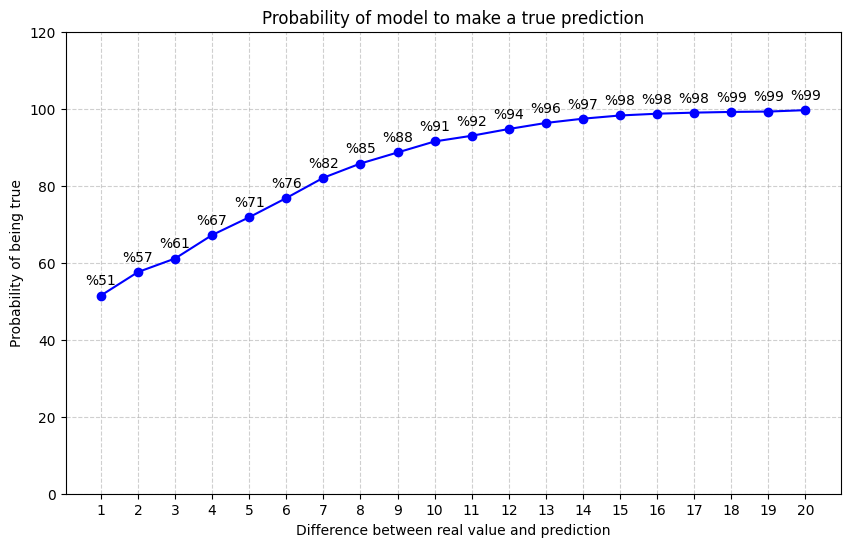

In [56]:
predictions = np.round(model.predict(test_set, verbose=0).flatten())
actuals = np.round(test_output.flatten())
graph_x = np.arange(1, 21)
graph_y = [np.mean(np.abs(actuals - predictions) <= j) *100 for j in graph_x]

plt.figure(figsize=(10, 6))
plt.plot(graph_x, graph_y, marker="o", linestyle="-", color="b")
for x, y in zip(graph_x, graph_y):
    plt.text(x, y + 2, f"%{int(y)}", ha="center", va="bottom")

plt.xticks(ticks=range(1, 21))
plt.ylim(0, 120)
plt.title("Probability of model to make a true prediction")
plt.xlabel("Difference between real value and prediction")
plt.ylabel("Probability of being true")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
# Creating a list of game names in order to use in search bar
name_list = []
for i in names[:, 1]:
    if i != 0:
        name_list.append(i)


# Functions for creating the search bars
def search(event=None):
    listbox.delete(0, END)
    word = search_bar.get()

    for category in name_list:
        if word.lower() in category.lower():
            listbox.insert(END, category)




def create_window():
    global listbox, root, search_bar, category
    category = ''
    root = tk.Tk()
    root.title("Category Search Bar")

    root.geometry("300x200+0+0")

    search_bar = Entry(root)
    search_bar.pack(pady=10)
    search_bar.bind("<KeyRelease>", search)

    scrollbar = Scrollbar(root)
    scrollbar.pack(side=tk.RIGHT, fill=tk.BOTH)

    listbox = Listbox(root, yscrollcommand=scrollbar.set)
    listbox.pack(pady=40, padx=40)


    def choose(event):
        global category
        category = listbox.get(listbox.curselection())
        root.destroy()



    listbox.bind("<<ListboxSelect>>", choose)
    scrollbar.config(command=listbox.yview)

    root.mainloop()



# Creating a program that can interpret the values that model gives
def input_creator(names,number):

    print("Please give the number of category which the game have")
    X = int(input())
    # Taking categories as an input and creating a list that contains them.
    category_list = []
    for x in range(X):
        create_window()
        category_list.append(category)

    number_list = []
    # Creating a list that contains numarical values of the categories.
    for i in category_list:
        for j in range(names.shape[0]):
            if i == names[j, 1]:
                number_list.append(names[j, 0])

    # Converting values to data which is going to used in models prediction
    def output_converter(x, number):
        input_ = np.zeros([1, coloumn])
        for i in x:
            input_[0, int(i)] = 1
        return input_
    single_test_input = output_converter(number_list, number)
    result = int(model.predict(single_test_input.reshape(1, coloumn)))
    print("The probability of the game score being between {} and {} is 20%.".format(result-3, result+3))
    print("The probability of the game score being between {} and {} is 40%.".format(result-6, result+6))
    print("The probability of the game score being between {} and {} is 60%.".format(result-10, result+10))
    print("The probability of the game score being between {} and {} is 80%.".format(result-15, result+15))
    return result

In [ ]:
input_creator(names,number)

In [ ]:
# Finally, some inferences can be made by using this model


# The function will generate a graph for a game category, selected at random, using various random categories
def random_graph(names, coloumn, number):
    first_category = np.random.randint(0, coloumn)
    results = np.zeros(5)
    total_categories = []

    # Choosing random categories
    for i in range(5):
        categories = []
        for j in range(2):
            x = np.random.randint(0, coloumn)
            while first_category == x:
                x = np.random.randint(0, coloumn)
            if x not in categories:
                categories.append(np.random.randint(0, coloumn))
        total_categories.append(categories)

        # Converting them into datas
        def output_converter(x, number):
            input_=np.zeros([1, coloumn])
            for i in x:
                input_[0,int(i)] = 1
            return input_
        single_test_input = output_converter(categories, number)
        result= int(model.predict(single_test_input.reshape(1, coloumn), verbose=0).flatten()[0])
        results[i]= result


    bars = plt.bar(range(5), results)
    index_no = 0
    for bar in bars:
        yval = bar.get_height()
        category_no = total_categories[index_no][1]
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(name_list[category_no]), ha='center', va='bottom')
        index_no += 1

    plt.ylim(min(results)-3, max(results)+3)
    plt.title('Probability of model to make a true prediction')
    plt.ylabel('Probable value')
    plt.title("Graph of '{}' games".format(name_list[first_category]))
    plt.show()

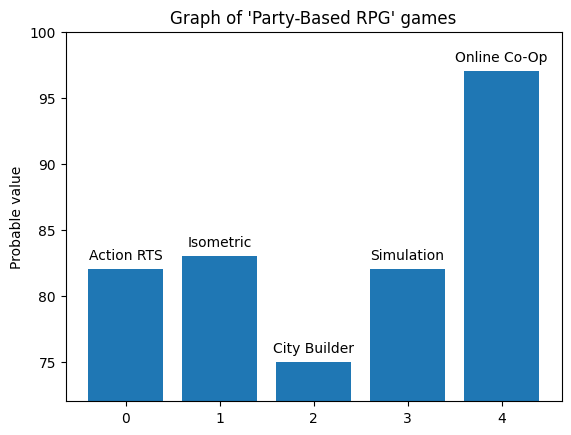

In [ ]:
random_graph(names,coloumn,number)


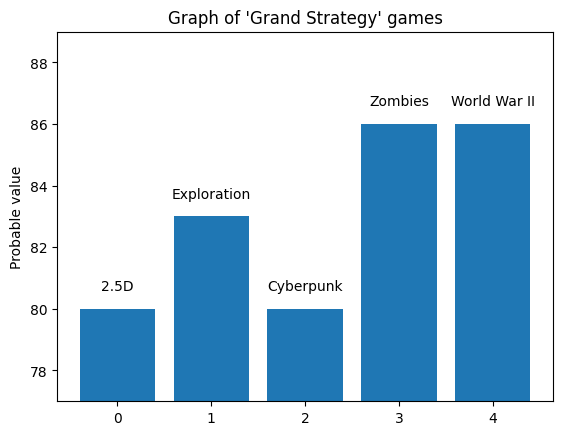

In [ ]:
random_graph(names,coloumn,number)


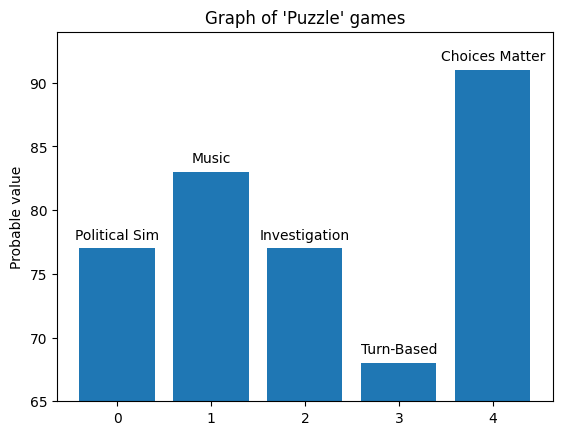

In [ ]:
random_graph(names,coloumn,number)


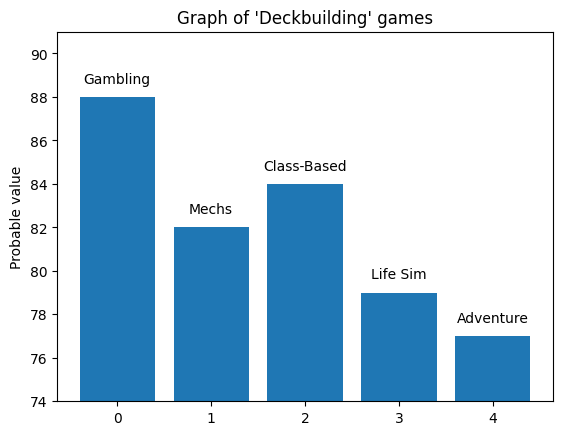

In [ ]:
random_graph(names,coloumn,number)
